In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Text(0,0.5,'Valve')

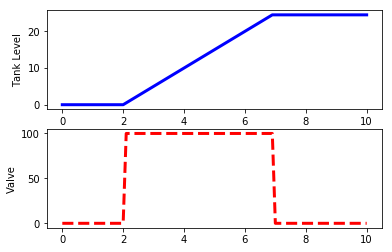

In [7]:
# define tank model
def tank(Level,time,c,valve):
    rho = 1000 # water density
    A = 1
    
    dLevel_dt = (c/(rho*A))*valve
    return dLevel_dt

ts = np.linspace(0,10,101)

# valve operation
c = 50 #valve coefficient [kg/s/%open]
u = np.zeros(101) # u= valve %open
u[21:70] = 100 # open valve between 2 and 7 seconds

#level initial condition
Level0 = 0

z = np.zeros(101)

for i in range (100):
    valve = u[i+1]
    y = odeint(tank,Level0,[0,0.1],args =(c,valve))
    Level0 = y[-1]  #take the last point
    z[i+1] = Level0 # store the level for plotting
    
#plot
plt.figure()
plt.subplot(2,1,1)
plt.plot(ts,z,'b-',linewidth=3)
plt.ylabel('Tank Level')
plt.subplot(2,1,2)
plt.plot(ts,u,'r--', linewidth=3)
plt.ylabel('Valve')
